## K-Nearest Neighbors (KNN)

This notebook demonstrates the implementation of the K-Nearest Neighbors (KNN) algorithm to classify an image using a provided dataset. We will perform 1-NN, 3-NN, and 5-NN classification and evaluate the results.


## 1. Importing Required Libraries

In [17]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from collections import Counter

## 2. Load the Dataset
Before running this block, ensure that "data.mat" is available in the specified path.

In [18]:
# Load the dataset
dataset_path = "./data.mat"
mat_contents = sio.loadmat(dataset_path)
images = mat_contents['images']
labels = mat_contents['C']

# Transpose and reshape the images to the appropriate format
images = np.transpose(images)
im = np.reshape(images, [32, 32, 3, -1], order="F")

# Display the shape of the dataset for verification
print(f"Dataset contains {im.shape[-1]} images, each of size {im.shape[:3]}")


Dataset contains 50 images, each of size (32, 32, 3)


## 3. Load and Preprocess the Test Image
Here, we load the test image, resize it to match the dataset, and then reshape it accordingly.

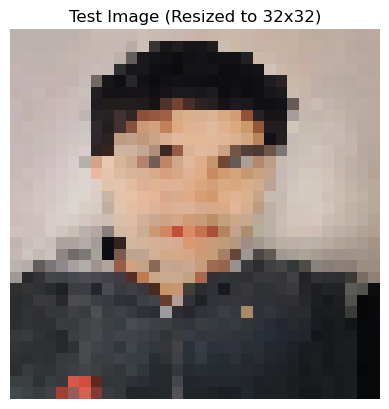

In [19]:
# Load the test image
test_image_path = './mypic.jpeg'
test_image = Image.open(test_image_path)
test_image = np.array(test_image)

# Resize the test image to 32x32 pixels
resized_image = cv2.resize(test_image, (32, 32))

# Reshape and normalize the test image
reshaped_image = resized_image.flatten(order="F") / 255.0

# Display the preprocessed test image
plt.imshow(resized_image)
plt.axis('off')
plt.title("Test Image (Resized to 32x32)")
plt.show()


## 4. Define the Euclidean Distance Function
This function calculates the Euclidean distance between two images.

In [20]:
def euclidean_distance(image1, image2):
    """Calculate the Euclidean distance between two images."""
    return np.linalg.norm(image1 - image2)


## 5. Implement 1-NN (1-Nearest Neighbor)
Here, we find the closest image in the dataset to our test image.

The closest match is image 42 with a distance of 15.251315673009508


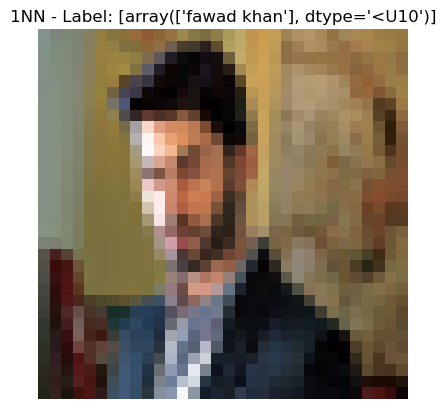

In [21]:
# 1-NN Implementation
min_distance = float('inf')
min_index = -1

# Iterate through the dataset to find the closest match
for i in range(im.shape[-1]):
    G = im[:, :, :, i].flatten(order="F") / 255.0
    distance = euclidean_distance(reshaped_image, G)
    if distance < min_distance:
        min_distance = distance
        min_index = i

# Display the closest match
print(f"The closest match is image {min_index} with a distance of {min_distance}")
closest_image = im[:, :, :, min_index]
plt.imshow(closest_image)
plt.axis('off')
plt.title(f"1NN - Label: {labels[min_index]}")
plt.show()


## 6. Implement 3-NN (3-Nearest Neighbors)
Now, we extend the process to find the three closest images.

The three closest matches are images [42, 13, 23] with distances [15.251315673009508, 15.57728706664886, 15.738749971735944]


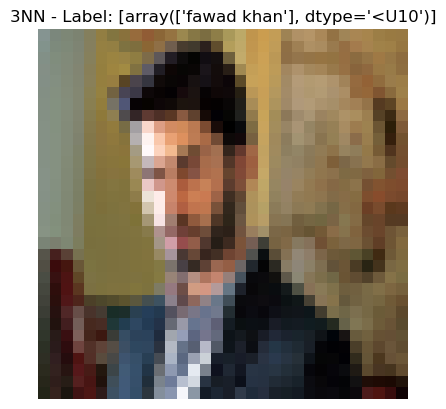

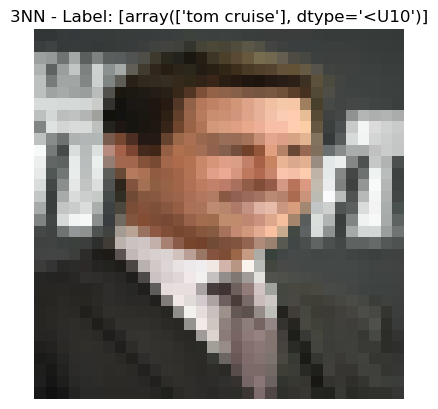

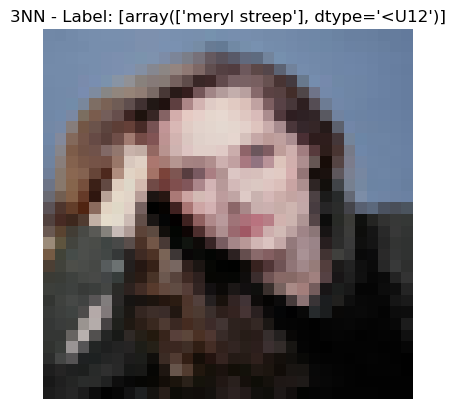

Most common label among 3 nearest neighbors: ['fawad khan']


In [22]:
# 3-NN Implementation
distances = []

# Calculate distances between the test image and all dataset images
for i in range(im.shape[-1]):
    G = im[:, :, :, i].flatten(order="F") / 255.0
    distance = euclidean_distance(reshaped_image, G)
    distances.append((distance, i))

# Sort and find the three closest matches
distances.sort(key=lambda x: x[0])
three_min_indices = [distances[i][1] for i in range(3)]

# Display the results for 3NN
print(f"The three closest matches are images {three_min_indices} with distances {[distances[i][0] for i in range(3)]}")
for index in three_min_indices:
    closest_image = im[:, :, :, index]
    plt.imshow(closest_image)
    plt.axis('off')
    plt.title(f"3NN - Label: {labels[index]}")
    plt.show()

# Majority voting for 3NN
closest_labels = [str(labels[index].flatten()[0]) for index in three_min_indices]
most_common_label = Counter(closest_labels).most_common(1)[0][0]
print(f"Most common label among 3 nearest neighbors: {most_common_label}")


## 7. Implement 5-NN (5-Nearest Neighbors)
Finally, we extend the process further to find the five closest images.

The five closest matches are images [42, 13, 23, 48, 47] with distances [15.251315673009508, 15.57728706664886, 15.738749971735944, 16.012228122360803, 16.046296437911085]


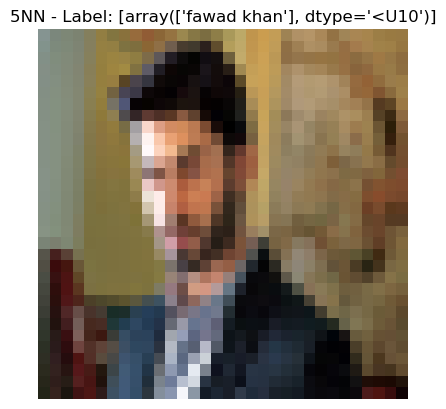

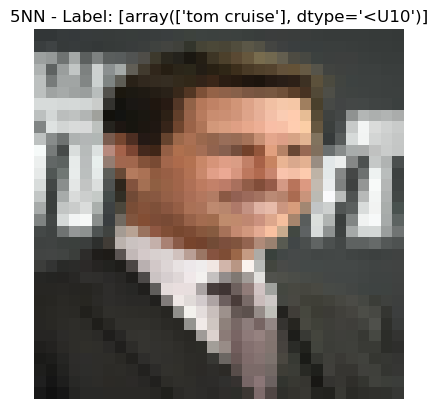

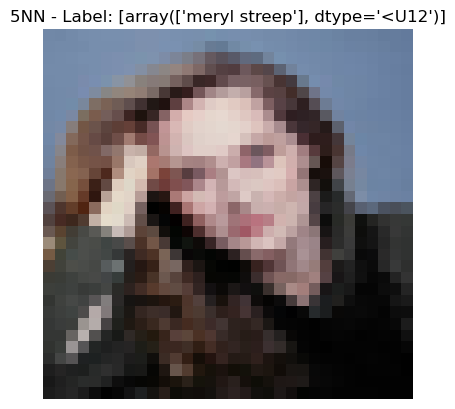

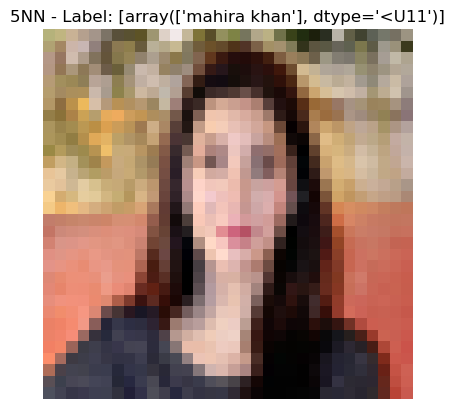

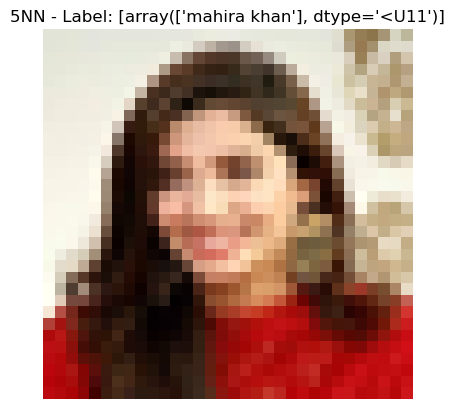

Most common label among 5 nearest neighbors: ['mahira khan']


In [23]:
# 5-NN Implementation
distances = []

# Calculate distances between the test image and all dataset images
for i in range(im.shape[-1]):
    G = im[:, :, :, i].flatten(order="F") / 255.0
    distance = euclidean_distance(reshaped_image, G)
    distances.append((distance, i))

# Sort and find the five closest matches
distances.sort(key=lambda x: x[0])
five_min_indices = [distances[i][1] for i in range(5)]

# Display the results for 5NN
print(f"The five closest matches are images {five_min_indices} with distances {[distances[i][0] for i in range(5)]}")
for index in five_min_indices:
    closest_image = im[:, :, :, index]
    plt.imshow(closest_image)
    plt.axis('off')
    plt.title(f"5NN - Label: {labels[index]}")
    plt.show()

# Majority voting for 5NN
closest_labels = [str(labels[index].flatten()[0]) for index in five_min_indices]
most_common_label = Counter(closest_labels).most_common(1)[0][0]
print(f"Most common label among 5 nearest neighbors: {most_common_label}")
